In [1]:
import json
import requests
from census import Census
from us import states
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gmaps
import gmaps.geojson_geometries
from matplotlib.cm import viridis
from matplotlib.colors import to_hex
import os
import gmaps.datasets
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
gkey = os.environ.get('gmaps')
gmaps.configure(api_key=gkey)
plotly.tools.set_credentials_file(username='willdoucet', api_key='PsaRlgAQKeEaFhQe1b6B')
c = Census("cb3da972a3410fea907ff2284991388d72455cad")

In [13]:
import plotly.graph_objs as go
import plotly.io as pio

In [2]:
state_fips = '06'
fips_list_with_state = []
fips_df = pd.read_csv('fips.csv', dtype=str)
fips_df

fips_list = fips_df['FIPS'].tolist()
county_names = fips_df['Name'].tolist()

for value in fips_list:
    
    fips_list_with_state.append(f'06{value}')
    
fips_list_with_state

['06001',
 '06003',
 '06005',
 '06007',
 '06009',
 '06011',
 '06013',
 '06015',
 '06017',
 '06019',
 '06021',
 '06023',
 '06025',
 '06027',
 '06029',
 '06031',
 '06033',
 '06035',
 '06037',
 '06039',
 '06041',
 '06043',
 '06045',
 '06047',
 '06049',
 '06051',
 '06053',
 '06055',
 '06057',
 '06059',
 '06061',
 '06063',
 '06065',
 '06067',
 '06069',
 '06071',
 '06073',
 '06075',
 '06077',
 '06079',
 '06081',
 '06083',
 '06085',
 '06087',
 '06089',
 '06091',
 '06093',
 '06095',
 '06097',
 '06099',
 '06101',
 '06103',
 '06105',
 '06107',
 '06109',
 '06111',
 '06113',
 '06115']

In [30]:
count = 0
for f in fips_list:
    
    #grab data
    data = c.acs5.state_county(('NAME','B25013_003E', 'B25013_004E','B25013_005E','B25013_006E','B25013_008E','B25013_009E','B25013_010E',
                      'B25013_011E'), state_fips, f, year=2016)
        
    temp_df = pd.DataFrame(data)
    #when count = 0 create initial housing_df dataframe
    if count == 0:
            
        housing_df = pd.DataFrame(temp_df)
    #when count > 0 append new data to housing_df dataframe    
    if count > 0:
            
        housing_df = housing_df.append(temp_df)
            
    count +=1

In [35]:
housing_df = housing_df.rename(columns={'B25013_003E': 'Owner - No High School', 'B25013_004E': 'Owner - High School',
                                        'B25013_005E': 'Owner - Some College or Associates Deg', 'B25013_006E': 'Owner - Bachelors',
                                       'B25013_008E': 'Renter - No High School', 'B25013_009E': 'Renter - High School',
                                        'B25013_010E': 'Renter - Some College or Associates Deg', 'B25013_011E': 'Renter - Bachelors',
                                        'NAME': 'County Name', 'county': 'County Code'
                                       })

In [34]:
del housing_df['state']

In [37]:
housing_df.set_index(['County Code', 'County Name'], inplace=True)

In [38]:
housing_df

,,Owner - No High School,Owner - High School,Owner - Some College or Associates Deg,Owner - Bachelors,Renter - No High School,Renter - High School,Renter - Some College or Associates Deg,Renter - Bachelors
County Code,County Name,,,,,,,,
001,"Alameda County, California",19404.0,37893.0,73411.0,165926.0,36210.0,46743.0,78829.0,105877.0
003,"Alpine County, California",21.0,62.0,72.0,125.0,12.0,8.0,20.0,23.0
005,"Amador County, California",672.0,2480.0,4637.0,2989.0,432.0,910.0,1608.0,520.0
007,"Butte County, California",3734.0,9594.0,19779.0,16944.0,3950.0,7194.0,17060.0,7250.0
009,"Calaveras County, California",943.0,2579.0,6644.0,3477.0,330.0,1197.0,1921.0,622.0
011,"Colusa County, California",967.0,911.0,1565.0,1046.0,974.0,583.0,747.0,169.0
013,"Contra Costa County, California",14038.0,32353.0,76185.0,127479.0,18359.0,27404.0,48327.0,43395.0
015,"Del Norte County, California",625.0,1484.0,2380.0,1259.0,301.0,982.0,1806.0,606.0
017,"El Dorado County, California",1741.0,8001.0,19286.0,21586.0,1908.0,3877.0,7625.0,3504.0


In [3]:
count = 0
for f in fips_list:
    
    #grab data
    data = c.acs5.state_county(('NAME', 'B08303_002E', 'B08303_003E', 'B08303_004E', 'B08303_005E', 'B08303_006E',
                             'B08303_007E', 'B08303_008E', 'B08303_009E', 'B08303_010E',
                             'B08303_011E', 'B08303_012E', 'B08303_013E'), state_fips, f, year=2016)
        
    temp_df = pd.DataFrame(data)
    #when count = 0 create initial commute_df dataframe
    if count == 0:
            
        commute_df = pd.DataFrame(temp_df)
    #when count > 0 append new data to commute_df dataframe    
    if count > 0:
            
        commute_df = commute_df.append(temp_df)
            
    count +=1

In [4]:
commute_df.rename(columns={'B08303_002E': '<5', 'B08303_003E': '5-9', 'B08303_004E': '10-14', 'B08303_005E': '15-19',
                           'B08303_006E': '20-24','B08303_007E': '25-29', 'B08303_008E': '30-34', 'B08303_009E': '35-39',
                           'B08303_010E': '40-44', 'B08303_011E': '45-59', 'B08303_012E': '60-89', 'B08303_013E': '>90',
                          'NAME': 'County Name', 'county': 'County Code'
                          }, inplace=True)

In [5]:
del commute_df['state']

commute_df.set_index(['County Code', 'County Name'], inplace=True)

for colname in commute_df.columns:
    commute_df[colname] = commute_df[colname].astype(float)

In [6]:
commute_df

,,<5,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-59,60-89,>90
County Code,County Name,,,,,,,,,,,,
001,"Alameda County, California",8506.0,40027.0,77266.0,93562.0,86160.0,36613.0,102883.0,22601.0,37324.0,86064.0,78299.0,23786.0
003,"Alpine County, California",12.0,60.0,48.0,35.0,13.0,34.0,44.0,12.0,34.0,43.0,0.0,0.0
005,"Amador County, California",866.0,1457.0,1415.0,1414.0,1244.0,613.0,986.0,309.0,310.0,896.0,1158.0,836.0
007,"Butte County, California",4311.0,15902.0,19019.0,12957.0,7406.0,4185.0,9214.0,1356.0,1504.0,3035.0,2247.0,1645.0
009,"Calaveras County, California",760.0,1595.0,1519.0,1167.0,1155.0,423.0,1382.0,636.0,1086.0,2321.0,1835.0,879.0
011,"Colusa County, California",715.0,1382.0,1131.0,1027.0,844.0,540.0,952.0,200.0,345.0,523.0,501.0,342.0
013,"Contra Costa County, California",6320.0,30103.0,49583.0,57745.0,48351.0,22501.0,57424.0,15123.0,23743.0,58883.0,72900.0,34064.0
015,"Del Norte County, California",702.0,1890.0,2291.0,1223.0,632.0,250.0,535.0,87.0,21.0,114.0,87.0,49.0
017,"El Dorado County, California",2733.0,7845.0,9735.0,10553.0,7989.0,4123.0,7931.0,2481.0,3175.0,6971.0,5454.0,2958.0


In [7]:
commute_med_num = []
commute_l = commute_df.sum(axis=1).tolist()

x= 0
commute_bracket = []
commute_tier = []
for value in commute_l:
    
    commute_med_num.append(value / 2)
    
commute_med_num

for index, row in commute_df.iterrows():
    count=0
    y=0
    for colname in commute_df.columns:
        
        if count <= commute_med_num[x]:
            
            count += row[colname]
            y+=1
            
        elif count > commute_med_num[x]:
            
            commute_bracket.append(colname)
            commute_tier.append(y)
            
            break
    x += 1

In [8]:
commute_colors = []
commute_tier_norm = []
for value in commute_tier:
    
    commute_denom = len(commute_df.columns)
    normalized_commute = value / commute_denom
    
    commute_tier_norm.append(normalized_commute)

In [24]:
commute_colorscale = [
    '#c2d1f0',
    '#99b3e6',
    '#7094db',
    '#4775d1',
    '#2e5cb8',
    '#193366'
]

commute_choro = ff.create_choropleth(fips=fips_list_with_state, values=commute_bracket, colorscale=commute_colorscale, scope=['CA'],
                                    county_outline={'color': 'rgb(255,255,255)', 'width': .5}, legend_title = 'Time in Minutes',
                                    title = 'Median Commute Time by County' 
                                    )
py.iplot(commute_choro, filename='Commute Time by County')

In [25]:
pio.write_image(commute_choro, 'images/commute_choro.png')

In [26]:
count = 0
for f in fips_list:
    
    #grab data
    data = c.acs5.state_county(('NAME', 'B19001_002E', 'B19001_003E', 'B19001_004E', 'B19001_005E', 'B19001_006E',
                         'B19001_007E', 'B19001_008E', 'B19001_009E', 'B19001_010E', 'B19001_011E',
                         'B19001_012E', 'B19001_013E', 'B19001_014E', 'B19001_015E', 'B19001_016E',
                         'B19001_017E'), state_fips, f, year=2016)
        
    temp_df = pd.DataFrame(data)
    #when count = 0 create initial income_df dataframe
    if count == 0:
            
        income_df = pd.DataFrame(temp_df)
    #when count > 0 append new data to income_df dataframe    
    if count > 0:
            
        income_df = income_df.append(temp_df)
            
    count +=1

In [27]:
income_df.rename(columns={'B19001_002E': '<.100', 'B19001_003E': '.10,000-.14,999', 'B19001_004E': '.15,000-.19,999',
                          'B19001_005E': '.200-.249', 'B19001_006E': '.250-.299', 'B19001_007E': '.300-.349',
                          'B19001_008E': '.350-.399', 'B19001_009E': '.400-.449', 'B19001_010E': '.450-.499',
                          'B19001_011E': '.500-.599', 'B19001_012E': '.600-.749', 'B19001_013E': '.750-.999',
                          'B19001_014E': '1.000-1.249', 'B19001_015E': '1.250-1.499', 'B19001_016E': '1.500-1.999',
                         'B19001_017E': '>2.000',
                          'NAME': 'County Name', 'county': 'County Code'
                          }, inplace=True)

In [28]:
del income_df['state']

income_df.set_index(['County Code', 'County Name'], inplace=True)

for colname in income_df.columns:
    income_df[colname] = income_df[colname].astype(float)

In [29]:
income_df

,,<.100,".10,000-.14,999",".15,000-.19,999",.200-.249,.250-.299,.300-.349,.350-.399,.400-.449,.450-.499,.500-.599,.600-.749,.750-.999,1.000-1.249,1.250-1.499,1.500-1.999,>2.000
County Code,County Name,,,,,,,,,,,,,,,,
001,"Alameda County, California",28717.0,24566.0,19440.0,20781.0,18185.0,18747.0,18175.0,18632.0,17294.0,35023.0,47856.0,67428.0,57480.0,42402.0,56858.0,72709.0
003,"Alpine County, California",22.0,25.0,29.0,18.0,9.0,10.0,7.0,13.0,0.0,29.0,61.0,33.0,34.0,18.0,9.0,26.0
005,"Amador County, California",801.0,705.0,829.0,839.0,657.0,768.0,656.0,497.0,703.0,1053.0,1828.0,2016.0,1136.0,763.0,403.0,594.0
007,"Butte County, California",7309.0,6537.0,5691.0,5337.0,4806.0,5216.0,4188.0,4188.0,3436.0,6544.0,7973.0,8968.0,5548.0,3450.0,3564.0,2750.0
009,"Calaveras County, California",863.0,1010.0,1106.0,969.0,1066.0,940.0,774.0,886.0,745.0,1257.0,1509.0,2087.0,1633.0,1135.0,955.0,778.0
011,"Colusa County, California",271.0,331.0,297.0,397.0,340.0,369.0,334.0,363.0,398.0,714.0,846.0,983.0,548.0,154.0,387.0,230.0
013,"Contra Costa County, California",15082.0,12997.0,12404.0,13217.0,11644.0,13480.0,11826.0,12851.0,12422.0,25197.0,35549.0,47864.0,40984.0,30195.0,39034.0,52794.0
015,"Del Norte County, California",941.0,881.0,805.0,452.0,531.0,486.0,376.0,426.0,357.0,918.0,932.0,959.0,652.0,243.0,266.0,218.0
017,"El Dorado County, California",2648.0,2866.0,2429.0,2832.0,2825.0,2921.0,3063.0,2052.0,2330.0,4530.0,6246.0,8405.0,6998.0,4933.0,5690.0,6760.0


In [30]:
income_med_num = []
income_l = income_df.sum(axis=1).tolist()

x= 0
income_bracket = []
income_tier = []
for value in income_l:
    
    income_med_num.append(value / 2)
    
income_med_num

for index, row in income_df.iterrows():
    count=0
    y=0
    for colname in income_df.columns:
        
        if count <= income_med_num[x]:
            
            count += row[colname]
            y+=1
            
        elif count > income_med_num[x]:
            
            income_bracket.append(colname)
            income_tier.append(y)
            
            break
    x += 1


In [31]:
income_df.to_csv('Income by County')

In [32]:
income_colorscale = ['#d9f2d9', '#b3e6b3', '#8cd98c', '#66cc66', '#39ac39', '#2d862d', '#133913']

income_choro = ff.create_choropleth(fips=fips_list_with_state, values=income_bracket, colorscale=income_colorscale, scope=['CA'],
                                   county_outline={'color': 'rgb(255,255,255)', 'width': .5}, legend_title = 'Median Income / 100,000',
                                    title = 'Median Income by County'
                                   )
py.iplot(income_choro, filename='Household Income by County')

In [33]:
pio.write_image(income_choro, 'images/Income Choro.png')

In [40]:
income_df

,,<.100,".10,000-.14,999",".15,000-.19,999",.200-.249,.250-.299,.300-.349,.350-.399,.400-.449,.450-.499,.500-.599,.600-.749,.750-.999,1.000-1.249,1.250-1.499,1.500-1.999,>2.000
County Code,County Name,,,,,,,,,,,,,,,,
001,"Alameda County, California",28717.0,24566.0,19440.0,20781.0,18185.0,18747.0,18175.0,18632.0,17294.0,35023.0,47856.0,67428.0,57480.0,42402.0,56858.0,72709.0
003,"Alpine County, California",22.0,25.0,29.0,18.0,9.0,10.0,7.0,13.0,0.0,29.0,61.0,33.0,34.0,18.0,9.0,26.0
005,"Amador County, California",801.0,705.0,829.0,839.0,657.0,768.0,656.0,497.0,703.0,1053.0,1828.0,2016.0,1136.0,763.0,403.0,594.0
007,"Butte County, California",7309.0,6537.0,5691.0,5337.0,4806.0,5216.0,4188.0,4188.0,3436.0,6544.0,7973.0,8968.0,5548.0,3450.0,3564.0,2750.0
009,"Calaveras County, California",863.0,1010.0,1106.0,969.0,1066.0,940.0,774.0,886.0,745.0,1257.0,1509.0,2087.0,1633.0,1135.0,955.0,778.0
011,"Colusa County, California",271.0,331.0,297.0,397.0,340.0,369.0,334.0,363.0,398.0,714.0,846.0,983.0,548.0,154.0,387.0,230.0
013,"Contra Costa County, California",15082.0,12997.0,12404.0,13217.0,11644.0,13480.0,11826.0,12851.0,12422.0,25197.0,35549.0,47864.0,40984.0,30195.0,39034.0,52794.0
015,"Del Norte County, California",941.0,881.0,805.0,452.0,531.0,486.0,376.0,426.0,357.0,918.0,932.0,959.0,652.0,243.0,266.0,218.0
017,"El Dorado County, California",2648.0,2866.0,2429.0,2832.0,2825.0,2921.0,3063.0,2052.0,2330.0,4530.0,6246.0,8405.0,6998.0,4933.0,5690.0,6760.0


In [43]:
income_rank_df = income_df

income_rank_df['Total People'] = income_l

income_rank_df['Percentage Rich'] = income_rank_df['>2.000'] / income_rank_df['Total People'] * 100

income_rank_df.sort_values('Percentage Rich', ascending=False)

,,<.100,".10,000-.14,999",".15,000-.19,999",.200-.249,.250-.299,.300-.349,.350-.399,.400-.449,.450-.499,.500-.599,.600-.749,.750-.999,1.000-1.249,1.250-1.499,1.500-1.999,>2.000,Total People,Percentage Rich
County Code,County Name,,,,,,,,,,,,,,,,,,
041,"Marin County, California",3524.0,3432.0,2992.0,3352.0,2906.0,3102.0,3202.0,3010.0,2675.0,5506.0,7208.0,11122.0,10432.0,7315.0,11224.0,23398.0,104400.0,22.411877
081,"San Mateo County, California",8038.0,6152.0,6554.0,7781.0,6588.0,7672.0,7060.0,7868.0,7198.0,14298.0,21186.0,31737.0,26467.0,21441.0,28647.0,52323.0,261010.0,20.046358
085,"Santa Clara County, California",22491.0,19179.0,16400.0,17579.0,16591.0,18359.0,16283.0,17367.0,16052.0,32065.0,47310.0,68990.0,66364.0,51033.0,75884.0,124632.0,626579.0,19.890868
075,"San Francisco County, California",22457.0,20708.0,12701.0,12106.0,10129.0,10310.0,9028.0,9532.0,8406.0,17317.0,25947.0,36378.0,33890.0,24935.0,37190.0,65763.0,356797.0,18.431489
013,"Contra Costa County, California",15082.0,12997.0,12404.0,13217.0,11644.0,13480.0,11826.0,12851.0,12422.0,25197.0,35549.0,47864.0,40984.0,30195.0,39034.0,52794.0,387540.0,13.622852
001,"Alameda County, California",28717.0,24566.0,19440.0,20781.0,18185.0,18747.0,18175.0,18632.0,17294.0,35023.0,47856.0,67428.0,57480.0,42402.0,56858.0,72709.0,564293.0,12.884973
059,"Orange County, California",45635.0,32680.0,33261.0,37032.0,35701.0,37019.0,34741.0,36168.0,34949.0,69344.0,93421.0,131384.0,104640.0,75565.0,95223.0,120249.0,1017012.0,11.823754
111,"Ventura County, California",8831.0,8532.0,8706.0,9603.0,9243.0,10230.0,9106.0,9924.0,9194.0,18666.0,26670.0,37145.0,29687.0,20187.0,25008.0,28606.0,269338.0,10.620856
055,"Napa County, California",1739.0,1973.0,1410.0,2121.0,1750.0,1728.0,1752.0,1991.0,2036.0,3386.0,4930.0,6413.0,5115.0,3613.0,4245.0,5173.0,49375.0,10.476962


In [ ]:
fake_education_pref = 1
fake_income_pref = 2

fake_ed_import = 10
fake_inc_import = 7

edmult = 4 - fake_education_pref
wealthmult = 4 - fake_income_pref

edscore = edmult * fake_ed_import * 

wealthscore = wealthmult * fake_inc_import


In [34]:
count = 0
for f in fips_list:
    
    #grab data
    data = c.acs5.state_county(('NAME', 'B15003_017E', 'B15003_018E', 'B15003_019E', 'B15003_020E', 'B15003_021E',
                         'B15003_022E', 'B15003_023E', 'B15003_024E', 'B15003_025E'), state_fips, f, year=2016)
        
    temp_df = pd.DataFrame(data)
    #when count = 0 create initial education_df dataframe
    if count == 0:
            
        education_df = pd.DataFrame(temp_df)
    #when count > 0 append new data to education_df dataframe    
    if count > 0:
            
        education_df = education_df.append(temp_df)
            
    count +=1

In [37]:
education_df.rename(columns={'B15003_017E': 'High School', 'B15003_018E': 'GED or Equivalent', 'B15003_019E': '<1yr College',
                             'B15003_020E': '>=1yr College No Deg', 'B15003_021E': 'Associates Deg',
                         'B15003_022E': 'Bachelors Deg', 'B15003_023E': 'Masters Deg', 'B15003_024E': 'Professional Deg',
                         'B15003_025E': 'PhD',
                          'NAME': 'County Name', 'county': 'County Code'
                          }, inplace=True)

In [38]:
del education_df['state']

education_df.set_index(['County Code', 'County Name'], inplace=True)

for colname in education_df.columns:
    education_df[colname] = education_df[colname].astype(float)

In [39]:
education_med_num = []
education_l = education_df.sum(axis=1).tolist()

x= 0
education_bracket = []
education_tier = []
for value in education_l:
    
    education_med_num.append(value / 2)
    
education_med_num

for index, row in education_df.iterrows():
    count=0
    y=0
    for colname in education_df.columns:
        
        if count <= education_med_num[x]:
            
            count += row[colname]
            y+=1
            
        elif count > education_med_num[x]:
            
            education_bracket.append(colname)
            education_tier.append(y)
            
            break
    x += 1

In [40]:
education_df.to_csv('Education DataFrame')

In [41]:
education_colorscale = ["#ebf3fb","#b3d2e9",
              "#57a0ce","#1361a9",
              "#08306b"]

education_choro = ff.create_choropleth(fips=fips_list_with_state, values=education_bracket, colorscale=education_colorscale, scope=['CA'],
                                      county_outline={'color': 'rgb(255,255,255)', 'width': .5}, legend_title = 'Education Level',
                                    title = 'Education Level by County'
                                      )
py.iplot(education_choro, filename='Level of Education by County')

In [42]:
pio.write_image(education_choro, 'images/Education Choro.png')

In [32]:
education_rank_df = education_df

education_rank_df['Educated'] = education_rank_df['Bachelors Deg'] + education_rank_df['Masters Deg'] + education_rank_df['Professional Deg'] + education_rank_df['PhD']

In [36]:
education_rank_df['Percent Educated'] = education_l

education_rank_df.rename(columns={'Percent Educated': 'Total People'}, inplace=True)

education_rank_df

,,High School,GED or Equivalent,<1yr College,>=1yr College No Deg,Associates Deg,Bachelors Deg,Masters Deg,Professional Deg,PhD,Educated,Total People
County Code,County Name,,,,,,,,,,,
001,"Alameda County, California",182207.0,18164.0,51468.0,157006.0,74447.0,282754.0,141689.0,32639.0,31512.0,488594.0,971886.0
003,"Alpine County, California",189.0,68.0,46.0,136.0,46.0,140.0,67.0,8.0,20.0,235.0,720.0
005,"Amador County, California",6562.0,1131.0,2815.0,6149.0,2554.0,4212.0,1192.0,540.0,240.0,6184.0,25395.0
007,"Butte County, California",27537.0,5238.0,12141.0,30746.0,14030.0,25225.0,8002.0,2915.0,1611.0,37753.0,127445.0
009,"Calaveras County, California",8057.0,1158.0,3421.0,7432.0,3692.0,4645.0,1550.0,424.0,226.0,6845.0,30605.0
011,"Colusa County, California",2712.0,214.0,640.0,2285.0,1331.0,1474.0,233.0,195.0,30.0,1932.0,9114.0
013,"Contra Costa County, California",121647.0,15145.0,46740.0,121850.0,61945.0,192616.0,73252.0,22496.0,14818.0,303182.0,670509.0
015,"Del Norte County, California",4703.0,1260.0,1749.0,3671.0,1659.0,1688.0,678.0,311.0,214.0,2891.0,15933.0
017,"El Dorado County, California",24533.0,3823.0,10586.0,25003.0,13770.0,27316.0,10371.0,3390.0,1900.0,42977.0,120692.0


In [39]:
education_rank_df['Percent Educated'] = education_rank_df['Educated'] / education_rank_df['Total People'] * 100
education_rank_df.sort_values('Percent Educated', ascending=False)

,,High School,GED or Equivalent,<1yr College,>=1yr College No Deg,Associates Deg,Bachelors Deg,Masters Deg,Professional Deg,PhD,Educated,Total People,Percent Educated
County Code,County Name,,,,,,,,,,,,
075,"San Francisco County, California",74280.0,9109.0,22834.0,75821.0,36363.0,220335.0,95666.0,32831.0,17732.0,366564.0,584971.0,62.663619
041,"Marin County, California",18946.0,2426.0,7505.0,27716.0,11753.0,61100.0,28898.0,12285.0,6010.0,108293.0,176639.0,61.307526
085,"Santa Clara County, California",168399.0,21352.0,53056.0,155265.0,89726.0,342701.0,208794.0,34369.0,44998.0,630862.0,1118660.0,56.394436
081,"San Mateo County, California",76639.0,8753.0,25738.0,71652.0,39861.0,148547.0,66121.0,20918.0,16375.0,251961.0,474604.0,53.088680
001,"Alameda County, California",182207.0,18164.0,51468.0,157006.0,74447.0,282754.0,141689.0,32639.0,31512.0,488594.0,971886.0,50.272769
113,"Yolo County, California",20263.0,3243.0,7646.0,16557.0,8049.0,25078.0,12765.0,4541.0,6541.0,48925.0,104683.0,46.736337
059,"Orange County, California",331483.0,34440.0,113750.0,324427.0,163428.0,520755.0,195472.0,58548.0,32797.0,807572.0,1775100.0,45.494451
013,"Contra Costa County, California",121647.0,15145.0,46740.0,121850.0,61945.0,192616.0,73252.0,22496.0,14818.0,303182.0,670509.0,45.216694
087,"Santa Cruz County, California",23374.0,3769.0,9305.0,30418.0,16140.0,40953.0,18085.0,4872.0,4476.0,68386.0,151392.0,45.171475


In [43]:
count = 0
for f in fips_list:
    
    #grab data
    data = c.acs5.state_county(('NAME', 'B25087_004E', 'B25087_005E', 'B25087_006E', 'B25087_007E', 'B25087_008E',
                         'B25087_009E', 'B25087_010E', 'B25087_011E', 'B25087_012E', 'B25087_013E', 'B25087_014E',
                         'B25087_015E', 'B25087_016E', 'B25087_017E'), state_fips, f, year=2016)
        
    temp_df = pd.DataFrame(data)
    #when count = 0 create initial mortgage_df dataframe
    if count == 0:
            
        mortgage_df = pd.DataFrame(temp_df)
    #when count > 0 append new data to mortgage_df dataframe    
    if count > 0:
            
        mortgage_df = mortgage_df.append(temp_df)
            
    count +=1

In [44]:
mortgage_df.rename(columns={'B25087_004E': '.200-.299', 'B25087_005E': '.300-.399', 'B25087_006E': '.400-.499',
                            'B25087_007E': '.500-.599', 'B25087_008E': '.600-.699', 'B25087_009E': '.700-.799',
                            'B25087_010E': '.800-.899', 'B25087_011E': '.900-.999', 'B25087_012E': '1.000-1.249',
                            'B25087_013E': '1.250-1.499', 'B25087_014E': '1.500-1.999', 'B25087_015E': '2.000-2.499',
                            'B25087_016E': '2.500-2.999', 'B25087_017E': '>3.000',
                          'NAME': 'County Name', 'county': 'County Code'
                          }, inplace=True)

In [45]:
del mortgage_df['state']

mortgage_df.set_index(['County Code', 'County Name'], inplace=True)

for colname in mortgage_df.columns:
    mortgage_df[colname] = mortgage_df[colname].astype(float)

In [46]:
mortgage_med_num = []
mortgage_l = mortgage_df.sum(axis=1).tolist()

x= 0
mortgage_bracket = []
mortgage_tier = []
for value in mortgage_l:
    
    mortgage_med_num.append(value / 2)
    
mortgage_med_num

for index, row in mortgage_df.iterrows():
    count=0
    y=0
    for colname in mortgage_df.columns:
        
        if count <= mortgage_med_num[x]:
            
            count += row[colname]
            y+=1
            
        elif count > mortgage_med_num[x]:
            
            mortgage_bracket.append(colname)
            mortgage_tier.append(y)
            
            break
    x += 1

In [47]:
mortgage_df.to_csv('Mortage DataFrame')

In [48]:
mortgage_colorscale = ["#ebf3fb","#d2e3f3","#b3d2e9",
              "#85bcdb","#57a0ce","#3082be","#1361a9",
              "#0b4083","#08306b"]

mortgage_choro = ff.create_choropleth(fips=fips_list_with_state, values=mortgage_bracket, colorscale=mortgage_colorscale, scope=['CA'],
                                     county_outline={'color': 'rgb(255,255,255)', 'width': .5}, legend_title = 'Mortgage Amount / 1000',
                                    title = 'Mortgage by County'
                                     )
py.iplot(mortgage_choro, filename='Monthly Mortage Payment by County')

In [49]:
pio.write_image(mortgage_choro, 'images/Mortgage Choro.png')

In [47]:
mortgage_df

,,.200-.299,.300-.399,.400-.499,.500-.599,.600-.699,.700-.799,.800-.899,.900-.999,1.000-1.249,1.250-1.499,1.500-1.999,2.000-2.499,2.500-2.999,>3.000
County Code,County Name,,,,,,,,,,,,,,
001,"Alameda County, California",230.0,355.0,496.0,890.0,1164.0,1618.0,1941.0,2290.0,8471.0,12013.0,34324.0,40762.0,36632.0,27327.0
003,"Alpine County, California",0.0,0.0,0.0,3.0,0.0,0.0,0.0,6.0,19.0,17.0,25.0,24.0,22.0,31.0
005,"Amador County, California",10.0,0.0,46.0,141.0,164.0,62.0,165.0,400.0,733.0,972.0,1794.0,1007.0,404.0,279.0
007,"Butte County, California",59.0,210.0,275.0,735.0,948.0,1189.0,1379.0,1531.0,4894.0,4555.0,7003.0,4406.0,1846.0,872.0
009,"Calaveras County, California",7.0,37.0,36.0,82.0,142.0,126.0,163.0,342.0,1133.0,1250.0,2140.0,1614.0,843.0,336.0
011,"Colusa County, California",0.0,31.0,24.0,27.0,87.0,67.0,70.0,113.0,495.0,594.0,695.0,242.0,125.0,35.0
013,"Contra Costa County, California",195.0,372.0,533.0,767.0,936.0,1491.0,2009.0,2530.0,8954.0,13319.0,32284.0,32369.0,27318.0,19606.0
015,"Del Norte County, California",17.0,38.0,98.0,160.0,88.0,96.0,148.0,295.0,354.0,521.0,766.0,385.0,162.0,58.0
017,"El Dorado County, California",29.0,176.0,219.0,199.0,219.0,475.0,613.0,730.0,2308.0,3476.0,7730.0,6803.0,5016.0,3849.0


In [46]:
mortgage_rank_df = mortgage_df

mortgage_rank_df

NameError: name 'mortage_df' is not defined

In [50]:
count = 0
for f in fips_list:
    
    #grab data
    data = c.acs5.state_county(('NAME', 'B25091_002E', 'B25091_003E', 'B25091_004E', 'B25091_005E', 'B25091_006E',
                         'B25091_007E', 'B25091_008E', 'B25091_009E', 'B25091_010E', 'B25091_011E'), state_fips, f, year=2016)
        
    temp_df = pd.DataFrame(data)
    #when count = 0 create initial mortgage_per_df dataframe
    if count == 0:
            
        mortgage_per_df = pd.DataFrame(temp_df)
    #when count > 0 append new data to mortgage_per_df dataframe    
    if count > 0:
            
        mortgage_per_df = mortgage_per_df.append(temp_df)
            
    count +=1

In [51]:
mortgage_per_df.rename(columns={'B25091_002E': 'Total', 'B25091_003E': '<10%', 'B25091_004E': '10%-14%',
                                                 'B25091_005E': '15%-19%', 'B25091_006E': '20%-24%', 'B25091_007E': '25%-29%',
                                                 'B25091_008E': '30%-34%', 'B25091_009E': '35%-39%', 'B25091_010E': '40%-49%',
                                                 'B25091_011E': '>50%',
                          'NAME': 'County Name', 'county': 'County Code'
                          }, inplace=True)

In [52]:
del mortgage_per_df['state']

mortgage_per_df.set_index(['County Code', 'County Name'], inplace=True)

for colname in mortgage_per_df.columns:
    mortgage_per_df[colname] = mortgage_per_df[colname].astype(float)

In [53]:
del mortgage_per_df['Total']

In [54]:
mortgage_per_med_num = []
mortgage_per_l = mortgage_per_df.sum(axis=1).tolist()

x= 0
mortgage_per_bracket = []
mortgage_per_tier = []
for value in mortgage_per_l:
    
    mortgage_per_med_num.append(value / 2)
    
mortgage_per_med_num

for index, row in mortgage_per_df.iterrows():
    count=0
    y=0
    for colname in mortgage_per_df.columns:
        
        if count <= mortgage_per_med_num[x]:
            
            count += row[colname]
            y+=1
            
        elif count > mortgage_per_med_num[x]:
            
            mortgage_per_bracket.append(colname)
            mortgage_per_tier.append(y)
            
            break
    x += 1

In [58]:
mortgage_per_bracket

['25%-29%',
 '35%-39%',
 '25%-29%',
 '25%-29%',
 '30%-34%',
 '25%-29%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '25%-29%',
 '30%-34%',
 '30%-34%',
 '25%-29%',
 '25%-29%',
 '25%-29%',
 '25%-29%',
 '35%-39%',
 '25%-29%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '25%-29%',
 '30%-34%',
 '35%-39%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '25%-29%',
 '30%-34%',
 '30%-34%',
 '25%-29%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '25%-29%',
 '30%-34%',
 '25%-29%',
 '25%-29%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '30%-34%',
 '25%-29%',
 '30%-34%']

In [55]:
mortgage_per_df.to_csv('Mortage as Percentage of Income DataFrame')

In [57]:
mortgage_per_colorscale = ["#b3d2e9",
              "#85bcdb","#3082be",
              "#0b4083","#08306b"]

mortgage_per_choro = ff.create_choropleth(fips=fips_list_with_state, values=mortgage_per_bracket, colorscale=mortgage_per_colorscale, scope=['CA'],
                                         county_outline={'color': 'rgb(255,255,255)', 'width': .5}, legend_title = 'Mortgage/Income',
                                    title = 'Mortgage as Percent of Income'
                                         )
py.iplot(mortgage_per_choro, filename='Percentage of Income Devoted to Mortgage')

In [59]:
count = 0
for f in fips_list:
    
    #grab data
    data = c.acs5.state_county(('NAME', 'B25070_001E', 'B25070_002E', 'B25070_003E', 'B25070_004E', 'B25070_005E',
                         'B25070_006E', 'B25070_007E', 'B25070_008E', 'B25070_009E', 'B25070_010E'), state_fips, f, year=2016)
        
    temp_df = pd.DataFrame(data)
    #when count = 0 create initial rent_per_df dataframe
    if count == 0:
            
        rent_per_df = pd.DataFrame(temp_df)
    #when count > 0 append new data to rent_per_df dataframe    
    if count > 0:
            
        rent_per_df = rent_per_df.append(temp_df)
            
    count +=1

In [60]:
rent_per_df.rename(columns={'B25070_001E': 'Total', 'B25070_002E': '<10', 'B25070_003E': '10-14',
                                                 'B25070_004E': '15-19', 'B25070_005E': '20-24', 'B25070_006E': '25-29',
                                                 'B25070_007E': '30-34', 'B25070_008E': '35-39', 'B25070_009E': '40-49',
                                                 'B25070_010E': '>50',
                          'NAME': 'County Name', 'county': 'County Code'
                          }, inplace=True)

In [61]:
del rent_per_df['state']
del rent_per_df['Total']
rent_per_df.set_index(['County Code', 'County Name'], inplace=True)

for colname in rent_per_df.columns:
    rent_per_df[colname] = rent_per_df[colname].astype(float)

In [62]:
rent_per_med_num = []
rent_per_l = rent_per_df.sum(axis=1).tolist()

x= 0
rent_per_bracket = []
rent_per_tier = []
for value in rent_per_l:
    
    rent_per_med_num.append(value / 2)
    
rent_per_med_num

for index, row in rent_per_df.iterrows():
    count=0
    y=0
    for colname in rent_per_df.columns:
        
        if count <= rent_per_med_num[x]:
            
            count += row[colname]
            y+=1
            
        elif count > rent_per_med_num[x]:
            
            rent_per_bracket.append(colname)
            rent_per_tier.append(y)
            
            break
    x += 1

In [63]:
rent_per_df.to_csv('Rent as Percentage of Income DataFrame')

In [64]:
rent_per_colorscale = ["#ebf3fb","#d2e3f3","#b3d2e9",
              "#85bcdb","#57a0ce","#3082be","#1361a9",
              "#0b4083","#08306b"]

rent_per_choro = ff.create_choropleth(fips=fips_list_with_state, values=rent_per_bracket, colorscale=rent_per_colorscale, scope=['CA'])
py.iplot(rent_per_choro, filename='Percentage of Income Devoted to Rent')

In [69]:
housing_price_df = pd.read_csv('zillow_housing_price.csv')
del housing_price_df['Unnamed: 0']
housing_price_list = housing_price_df['Median Value'].tolist()

In [70]:
housing_price_endpoints = list(np.mgrid[min(housing_price_list):max(housing_price_list):14j])
#housing_price_fig = ff.create_choropleth()
mortgage_price_colorscale = ["#cccccc","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
housing_price_endpoints

[0.0,
 107030.76923076923,
 214061.53846153847,
 321092.3076923077,
 428123.07692307694,
 535153.8461538461,
 642184.6153846154,
 749215.3846153846,
 856246.1538461539,
 963276.9230769231,
 1070307.6923076923,
 1177338.4615384615,
 1284369.2307692308,
 1391400.0]

In [74]:
housing_price_fig = ff.create_choropleth(fips = fips_list_with_state, values = housing_price_list,
                                        colorscale = mortgage_price_colorscale, binning_endpoints = housing_price_endpoints,
                                         scope = ['CA'],
                                         county_outline={'color': 'rgb(255,255,255)', 'width': .5}, legend_title = 'Median Dollar Value of Homes',
                                    title = 'Median Housing Price by County'

)

In [75]:
py.iplot(housing_price_fig, filename='Housing Price by County')

In [76]:
pio.write_image(housing_price_fig, 'images/Housing Value Choro.png')

In [84]:
income_vs_housing = pd.DataFrame(income_bracket, housing_price_list, index=county_names)

TypeError: __init__() got multiple values for argument 'index'

In [87]:
income_vs_housing = income_vs_housing.reset_index()

In [88]:
income_vs_housing['County Name'] = county_names

In [90]:
income_vs_housing.set_index('County Name', inplace=True)

In [93]:
income_graph_list = income_vs_housing.loc[income_vs_housing['index'] != 0]

In [97]:
income_graph_list.rename(columns={'index': 'Housing Price', 0: 'Median Income'}, inplace=True)

In [105]:
income_graph_list['Median Income'] = income_graph_list['Median Income'].astype(float)

ValueError: could not convert string to float: '1.000-1.249'

In [113]:
#
income_float_list = []
for index, row in income_graph_list.iterrows():
    
    if row['Median Income'] == '.400-.449':
        
        income_float_list.append(425000)
        
    elif row['Median Income'] == '.450-.499':
    
        income_float_list.append(475000)
        
    elif row['Median Income'] == '.500-.549':
        
        income_float_list.append(525000)
    
    elif row['Median Income'] == '.500-.599':
        
        income_float_list.append(550000)
    
    elif row['Median Income'] == '.600-.749':
        
        income_float_list.append(675000)
        
    elif row['Median Income'] == '.650-.699':
        
        income_float_list.append(675000)
        
    elif row['Median Income'] == '.700-.749':
        
        income_float_list.append(725000)
        
    elif row['Median Income'] == '.750-.999':
        
        income_float_list.append(875000)
        
    elif row['Median Income'] == '1.000-1.249':
        
        income_float_list.append(1125000)
        
    elif row['Median Income'] == '1.250-1.499':
        
        income_float_list.append(1375000)
        

In [116]:
income_graph_list['Average Income'] = income_float_list

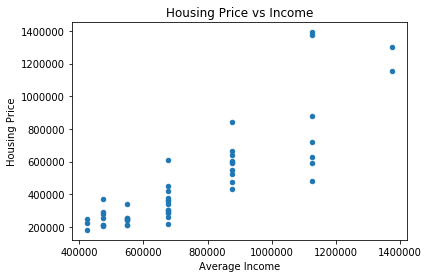

In [120]:
income_graph_list.plot(kind='scatter', x='Average Income', y='Housing Price')
plt.title('Housing Price vs Income')
plt.savefig('images/Housing Price vs Income')

In [131]:


count = 0
for f in fips_list:
    
    #grab data
    data = c.acs5.state_county(('NAME', 'B25064_001E'), state_fips, f, year=2016)
        
    temp_df = pd.DataFrame(data)
    #when count = 0 create initial rent_df dataframe
    if count == 0:
            
        rent_df = pd.DataFrame(temp_df)
    #when count > 0 append new data to rent_df dataframe    
    if count > 0:
            
        rent_df = rent_df.append(temp_df)
            
    count +=1

In [132]:
rent_df.rename(columns={'B25070_001E': 'Total', 'B25064_001E': 'Median Rent',
                          'NAME': 'County Name', 'county': 'County Code'
                          }, inplace=True)

In [133]:
del rent_df['state']
rent_df.set_index(['County Code', 'County Name'], inplace=True)

for colname in rent_df.columns:
    rent_df[colname] = rent_df[colname].astype(float)

In [134]:
rent_med_num = []
rent_l = rent_df.sum(axis=1).tolist()

x= 0
rent_bracket = []
rent_tier = []
for value in rent_l:
    
    rent_med_num.append(value / 2)
    
rent_med_num

for index, row in rent_df.iterrows():
    count=0
    y=0
    for colname in rent_df.columns:
        
        if count <= rent_med_num[x]:
            
            count += row[colname]
            y+=1
            
        elif count > rent_med_num[x]:
            
            rent_bracket.append(colname)
            rent_tier.append(y)
            
            break
    x += 1

In [137]:
rent_bracket = rent_df['Median Rent'].tolist()

In [139]:
rent_endpoints = list(np.mgrid[min(rent_bracket):max(rent_bracket):12j])
#rent_fig = ff.create_choropleth()
mortgage_price_colorscale = ["#cccccc","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
rent_endpoints

[681.0,
 785.4545454545455,
 889.9090909090909,
 994.3636363636364,
 1098.8181818181818,
 1203.2727272727273,
 1307.7272727272727,
 1412.181818181818,
 1516.6363636363635,
 1621.090909090909,
 1725.5454545454545,
 1830.0]

In [141]:
rent_fig = ff.create_choropleth(fips = fips_list_with_state, values = rent_bracket,
                                        colorscale = mortgage_price_colorscale, binning_endpoints = rent_endpoints,
                                         scope = ['CA'],
                                         county_outline={'color': 'rgb(255,255,255)', 'width': .5}, legend_title = 'Amount of Rent',
                                    title = 'Median Rent by County')
py.iplot(rent_fig, filename='Housing Price by County')

C:\Users\Will\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.


C:\Users\Will\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [142]:
pio.write_image(rent_fig, 'images/Rent by County.png')

In [123]:


count = 0
for f in fips_list:
    
    #grab data
    data = c.acs5.state_county(('NAME', 'B25097_001E'), state_fips, f, year=2016)
        
    temp_df = pd.DataFrame(data)
    #when count = 0 create initial mort_df dataframe
    if count == 0:
            
        mort_df = pd.DataFrame(temp_df)
    #when count > 0 append new data to mort_df dataframe    
    if count > 0:
            
        mort_df = mort_df.append(temp_df)
            
    count +=1

In [124]:
mort_df

,B25097_001E,NAME,county,state
0,593500.0,"Alameda County, California",001,06
0,329500.0,"Alpine County, California",003,06
0,265900.0,"Amador County, California",005,06
0,228500.0,"Butte County, California",007,06
0,259000.0,"Calaveras County, California",009,06
0,205000.0,"Colusa County, California",011,06
0,472900.0,"Contra Costa County, California",013,06
0,183600.0,"Del Norte County, California",015,06
0,379200.0,"El Dorado County, California",017,06
0,204900.0,"Fresno County, California",019,06
